In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras.models as km
from keras.models import Sequential
from keras import activations, initializers, regularizers, constraints
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/winequality-red.csv")

In [ ]:
dataset.shape

(1599, 12)

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
pd.isnull(dataset).sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
dataset['quality'].dtypes

dtype('int64')

In [ ]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

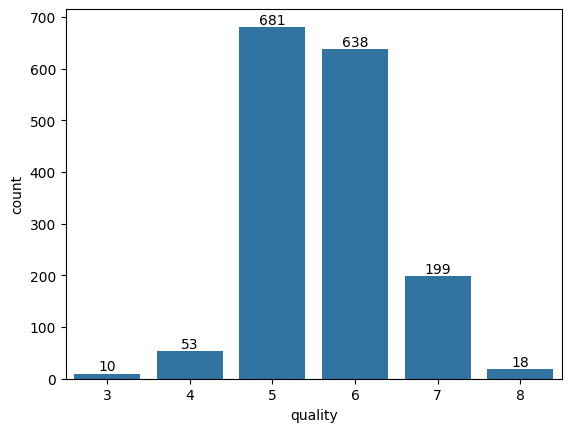

In [ ]:
ax=sns.countplot(x='quality',data=dataset)
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
dataset[['alcohol','density']].describe()

,alcohol,density
count,1599.000000,1599.000000
mean,10.422983,0.996747
std,1.065668,0.001887
min,8.400000,0.990070
25%,9.500000,0.995600
50%,10.200000,0.996750
75%,11.100000,0.997835
max,14.900000,1.003690


<Axes: xlabel='alcohol', ylabel='quality'>

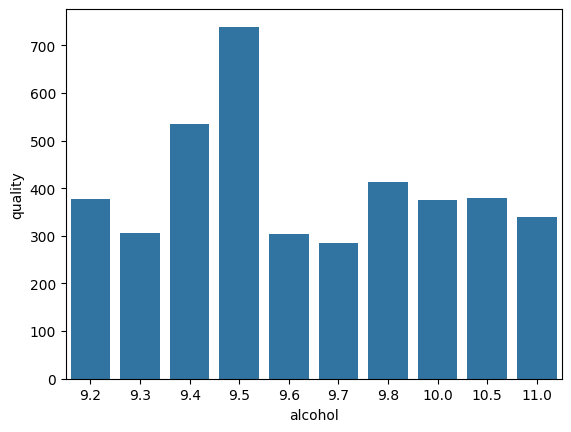

In [ ]:
qual_al=dataset.groupby(['alcohol'],as_index=False)['quality'].sum().sort_values(by='quality',ascending=False).head(10)
sns.barplot(x='alcohol',y='quality',data=qual_al)

<Axes: xlabel='alcohol', ylabel='pH'>

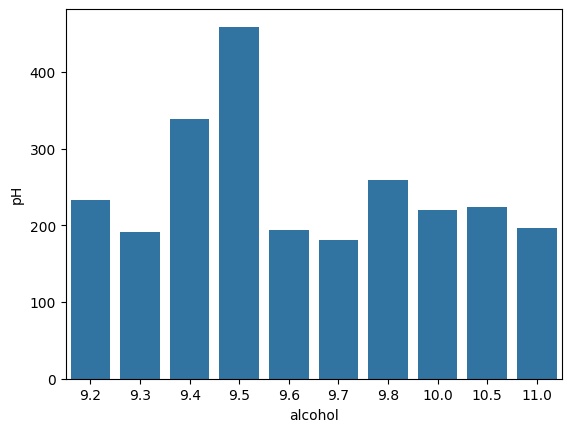

In [ ]:
qual_al=dataset.groupby([''],as_index=False)['pH'].sum().sort_values(by='pH',ascending=False).head(10)
sns.barplot(x='alcohol',y='pH',data=qual_al)

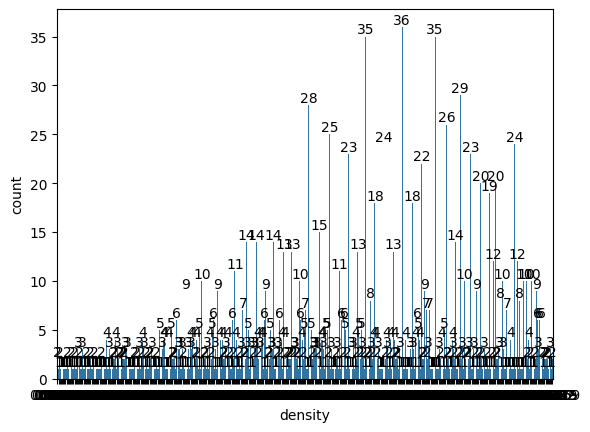

In [ ]:
ax=sns.countplot(x='density',data=dataset)
for bars in ax.containers:
  ax.bar_label(bars)

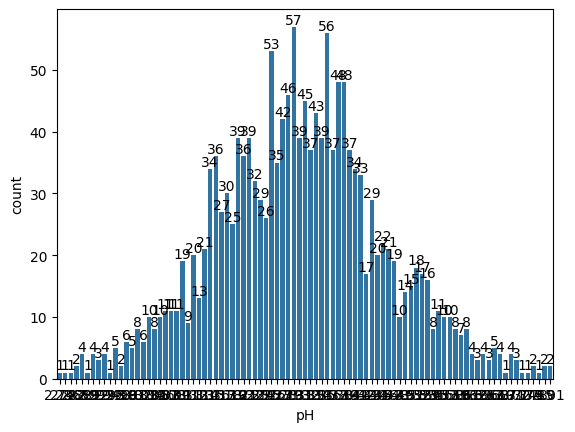

In [ ]:
ax=sns.countplot(x='pH',data=dataset)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

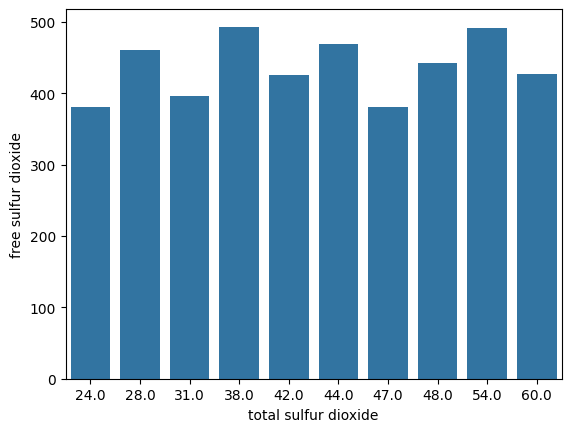

In [ ]:
qual_al=dataset.groupby(['total sulfur dioxide'],as_index=False)['free sulfur dioxide'].sum().sort_values(by='free sulfur dioxide',ascending=False).head(10)
sns.barplot(x='total sulfur dioxide',y='free sulfur dioxide',data=qual_al)

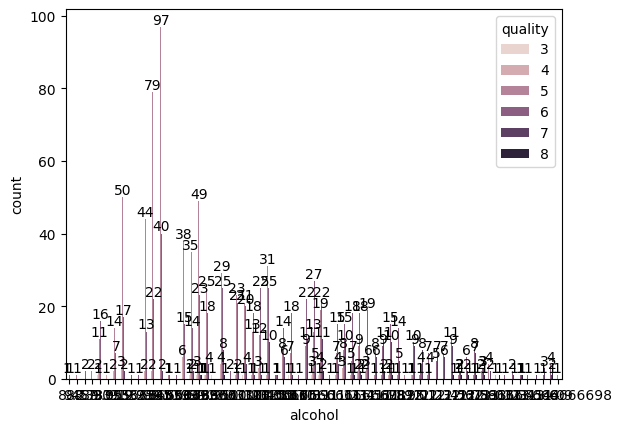

In [ ]:
ax = sns.countplot(data=dataset,x='alcohol',hue='quality')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='alcohol', ylabel='residual sugar'>

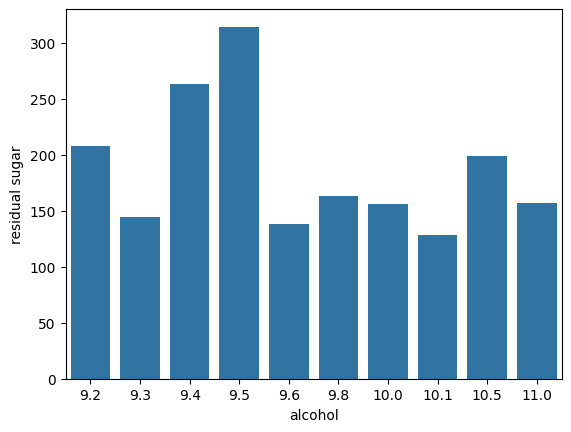

In [ ]:
qual_al=dataset.groupby(['alcohol'],as_index=False)['residual sugar'].sum().sort_values(by='residual sugar',ascending=False).head(10)
sns.barplot(x='alcohol',y='residual sugar',data=qual_al)

<Axes: xlabel='sulphates', ylabel='residual sugar'>

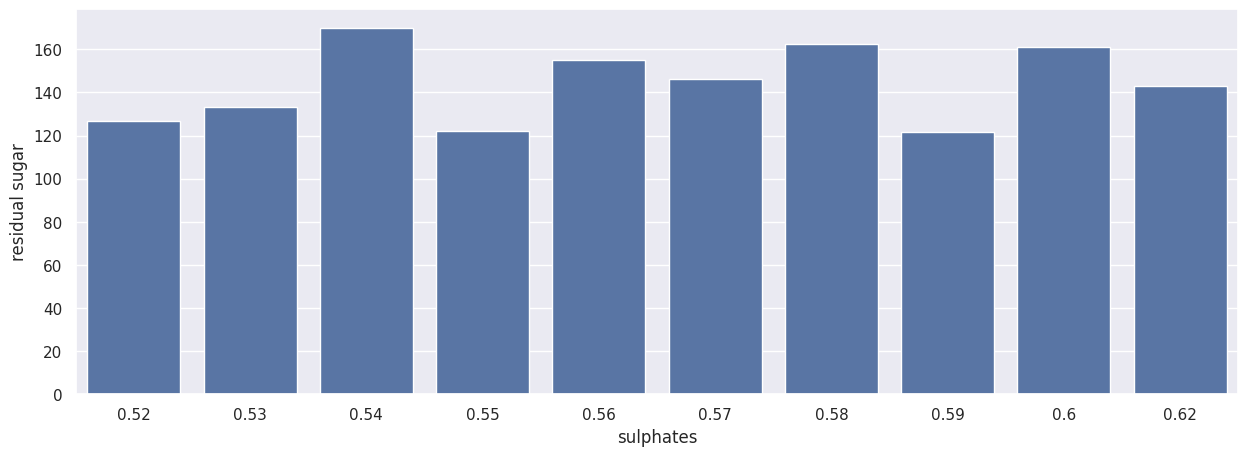

In [ ]:
qual_al=dataset.groupby(['sulphates'],as_index=False)['residual sugar'].sum().sort_values(by='residual sugar',ascending=False).head(10)
sns.barplot(x='sulphates',y='residual sugar',data=qual_al)

<Axes: xlabel='alcohol', ylabel='quality'>

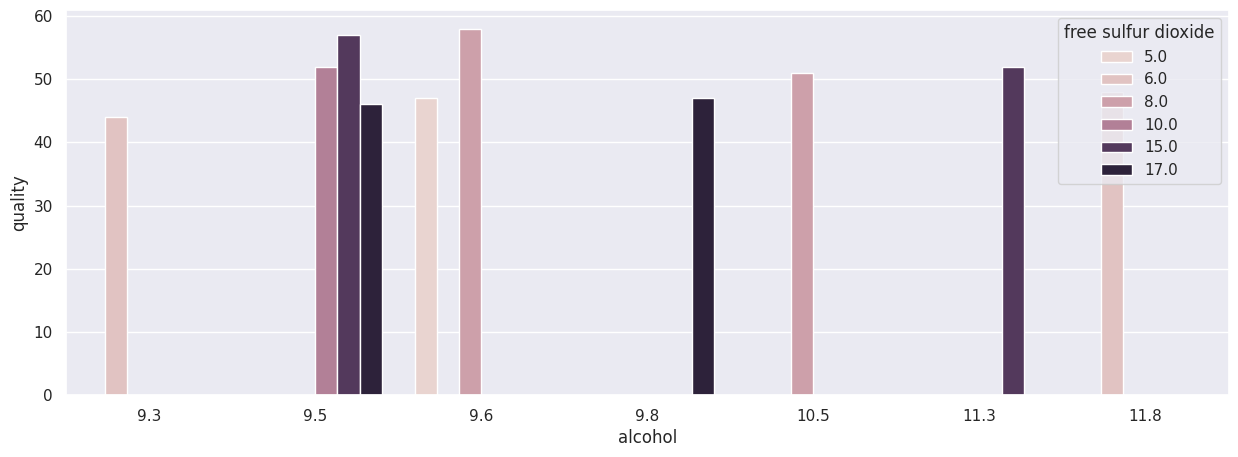

In [ ]:
sales_state=dataset.groupby(['free sulfur dioxide','alcohol'],as_index=False)['quality'].sum().sort_values(by='quality',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='alcohol',y='quality',hue='free sulfur dioxide',data=sales_state)

<Axes: xlabel='chlorides', ylabel='residual sugar'>

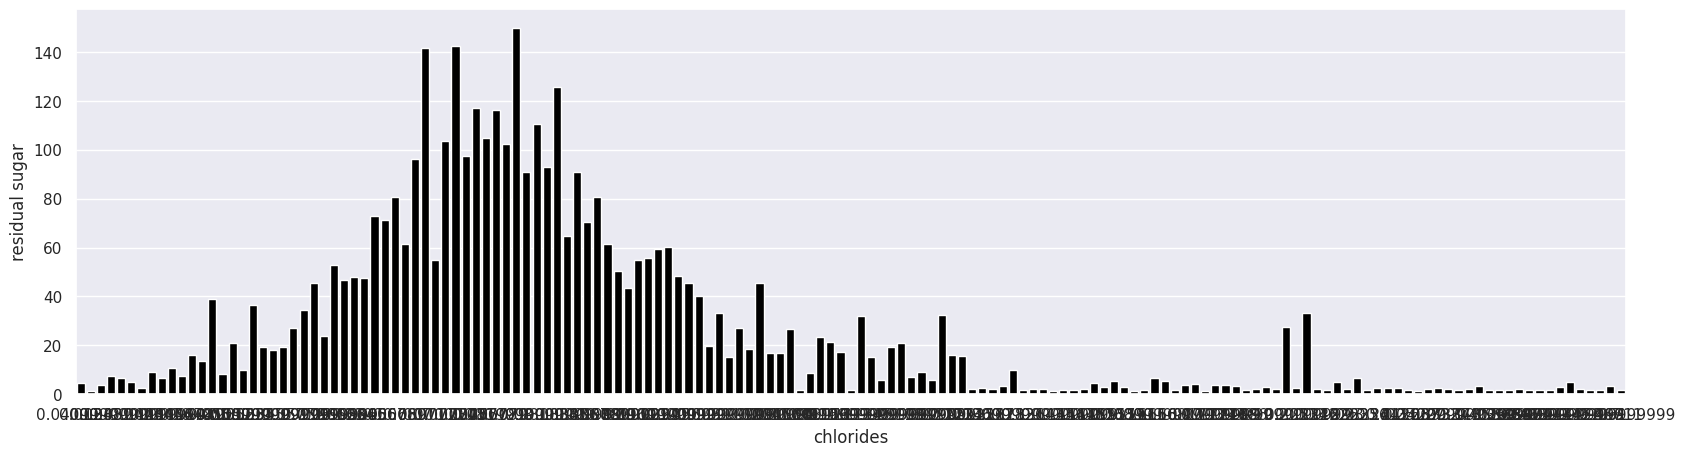

In [ ]:
sales_by_chlorides=dataset.groupby(['chlorides'],as_index=False)['residual sugar'].sum().sort_values(by='residual sugar',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='chlorides',y='residual sugar',color='black',data=sales_by_chlorides)

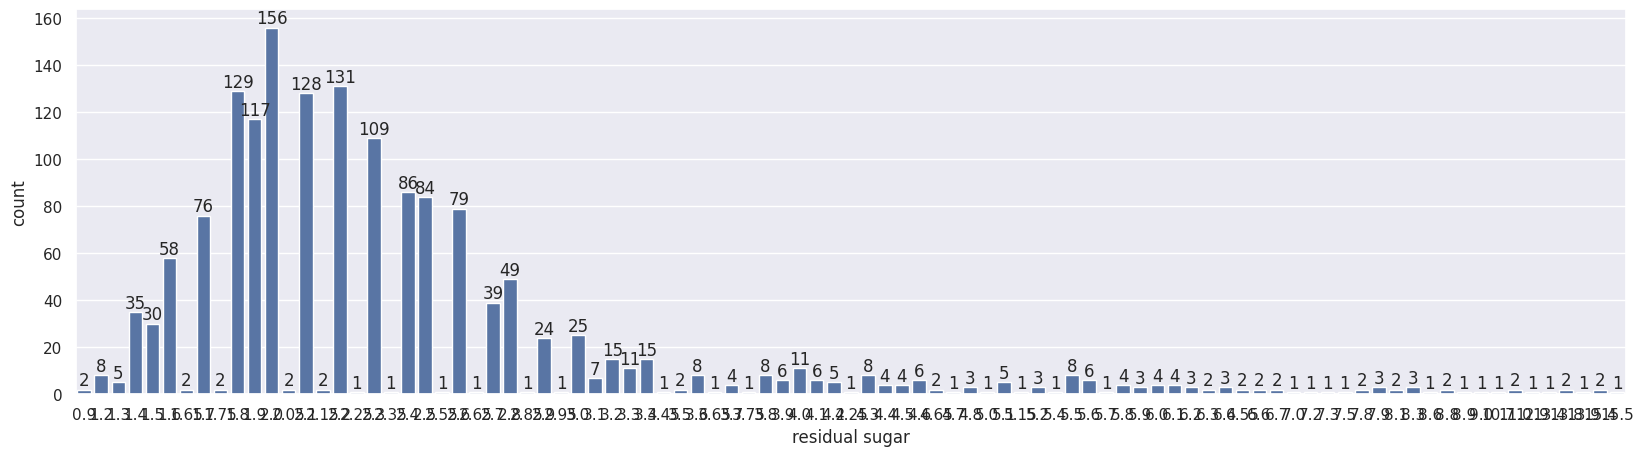

In [ ]:
ax = sns.countplot(data=dataset, x='residual sugar')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

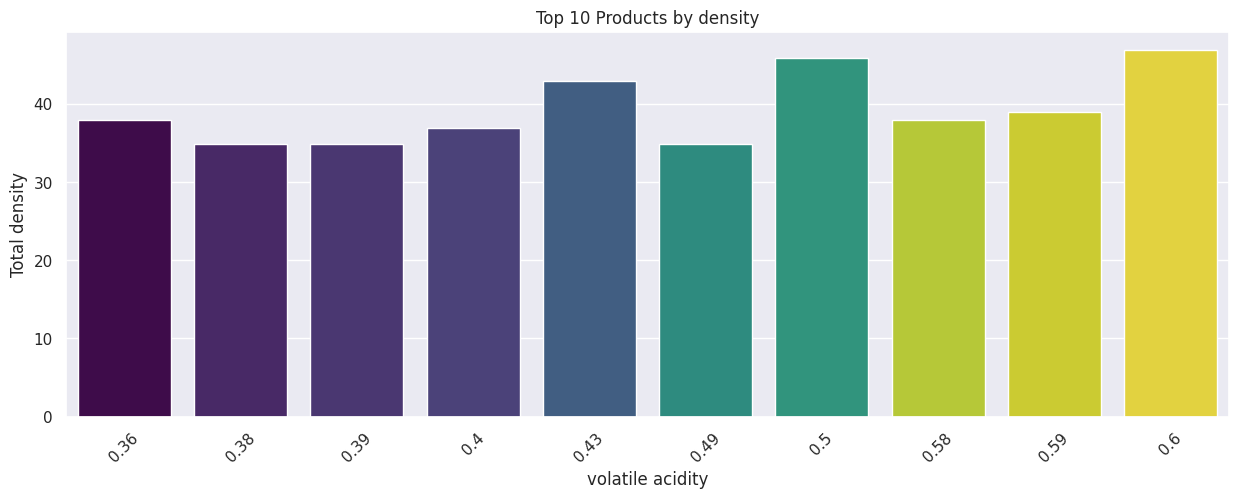

In [ ]:
orders_by_product_id = dataset.groupby(['volatile acidity'], as_index=False)['density'].sum().sort_values(by='density', ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=orders_by_product_id.head(10), x='volatile acidity', y='density', hue='volatile acidity', legend=False, palette='viridis')
plt.title('Top 10 Products by density')
plt.xlabel('volatile acidity')
plt.ylabel('Total density')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
X=dataset.drop(columns=['quality'])
Y=dataset['quality']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=123)
train_X.shape

(1279, 11)

In [ ]:
model = Sequential()
model.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
print(train_X.shape)
print(train_Y.shape)

(1279, 11)
(1279,)


In [ ]:
model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.1)
mse= model.evaluate(test_X, test_Y)
print(f'Test mean squared errorr:{mse}')

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4381 - val_loss: 0.4874
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4552 - val_loss: 0.4658
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4634 - val_loss: 0.4618
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4368 - val_loss: 0.4869
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4659 - val_loss: 0.4881
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4340 - val_loss: 0.4624
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4699 - val_loss: 0.4771
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4377 - val_loss: 0.4799
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4118 - val_loss: 0.4731
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4564 - val_loss: 0.4567
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4097 - val_loss: 0.4666
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4461 - val_lo

In [54]:
predictions=model.predict(test_X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


In [55]:
predictions

array([[6.3851175],
       [4.998781 ],
       [4.882901 ],
       [6.3820467],
       [5.331637 ],
       [5.5459213],
       [6.2198844],
       [5.599377 ],
       [5.489854 ],
       [5.587252 ],
       [5.0077085],
       [6.645786 ],
       [5.694876 ],
       [6.047915 ],
       [5.7495127],
       [6.005608 ],
       [4.9846735],
       [6.00386  ],
       [5.955891 ],
       [5.20777  ],
       [5.989123 ],
       [5.694876 ],
       [5.6217494],
       [5.236481 ],
       [5.3406696],
       [5.290254 ],
       [5.7284236],
       [5.729217 ],
       [5.9306073],
       [5.681831 ],
       [5.0053754],
       [6.4172487],
       [5.3930016],
       [5.042604 ],
       [6.1861386],
       [4.8886123],
       [5.3176703],
       [6.6387076],
       [4.8389525],
       [5.102937 ],
       [5.3726583],
       [6.095578 ],
       [5.8760858],
       [5.483311 ],
       [5.2945576],
       [4.963544 ],
       [5.3676972],
       [4.9957447],
       [5.94187  ],
       [5.4098687],
